In [150]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# all of the imports
import pandas as pd
import numpy as np
import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from scipy import stats 
% matplotlib inline

In [181]:
#This is my main dataframe for model, a combination of many others merged throughout this notebook
df = pd.read_csv('./data/Countries_Obesity_data.csv') 
df.head()

,Unnamed: 0,Unnamed: 0.1,country,Percent_Obese,GDPper_cap,Insufficiently_active,Education,Region_Africa,Region_Arab_States,Region_Europe,...,Urbanization_Rate,Urban_Population,Imports,log(Imports),log(Imports)*Asia,Asia*Urbanization,UrbanPop*ArabStates,Asia*Globalization,Urbanization*GDPpercap,Europe*GDPpercap
0,0,0,Russia,24.1,26500,9.5,0.780,0,0,0,...,-0.13,74.0,1.651000e+11,25.829817,0.000000,-0.00,0.0,0.00,-1.324037,0
1,1,1,Qatar,42.3,127700,41.6,0.686,0,1,0,...,6.02,99.2,3.376000e+10,24.242543,0.000000,0.00,99.2,0.00,70.779783,0
2,2,2,Luxembourg,23.1,10400,28.5,0.762,0,0,1,...,1.71,90.2,1.833000e+10,23.631805,0.000000,0.00,0.0,0.00,15.816749,10400
3,3,3,Singapore,6.2,87900,33.1,0.768,0,0,0,...,2.02,100.0,2.713000e+11,26.326491,26.326491,2.02,0.0,78.63,22.995589,0
4,4,4,Kuwait,39.7,71900,56.6,0.646,0,1,0,...,3.63,98.3,2.832000e+10,24.066834,0.000000,0.00,98.3,0.00,40.594405,0


In [152]:
'''''''''''
Globalization was brought in as new variable. Was later merged to main dataframe
'''''''''''

###df2 = pd.read_csv('Globalisation_Index.csv')

"''\nGlobalization was brought in as new variable. Was later merged to main dataframe\n"

In [153]:
df.shape

(157, 23)

df3 = pd.merge(df1,df2,on='country') 

In [154]:
#df3 = pd.merge(df,df2,on='country') 

In [155]:
''''''''''
Brought in Imports as new variable, stripped commas and $, finally merged with main dataframe
'''''''''''
#df_Imports = pd.read_csv('Imports.csv')
#df_Imports['Imports_'] = df_Imports['Imports'].str.replace('$','')
#df_Imports['Imports_'] = df_Imports['Imports_'].str.replace(',','')
#df_Imports['Imports_'] =  pd.to_numeric(df_Imports['Imports_'])
df.columns

Index(['Unnamed: 0', 'country', 'Percent_Obese', 'GDPper_cap',
       'Insufficiently_active', 'Education', 'Region_Africa',
       'Region_Arab_States', 'Region_Europe', 'Region_Asia_Pacific',
       'Region_Latin_America', 'Region_CIS', 'Globalization_index',
       'Urbanization_Rate', 'Urban_Population', 'Imports', 'log(Imports)',
       'log(Imports)*Asia', 'Asia*Urbanization', 'UrbanPop*ArabStates',
       'Asia*Globalization', 'Urbanization*GDPpercap', 'Europe*GDPpercap'],
      dtype='object')

In [156]:
"""""""""""
Brought in Urbanization rate as new variable, later merged with main dataframe
"""""""""""

#df_urban = pd.read_csv('Urbanization.csv')
#df_urban.head()

'""\nBrought in Urbanization rate as new variable, later merged with main dataframe\n'

In [157]:
'''''''''''''''
Attempted to use workforce by sector as a variable, none proved to be statisticalls signficant and all
variables were removed from model

'''''''''''''''
#df_workforce = pd.read_csv('Workforce.csv')
#df_workforce['Agriculture'] =  pd.to_numeric(df_workforce['Agriculture'])
#df_workforce['Industry'] =  pd.to_numeric(df_workforce['Industry'])
#df_workforce['Service'] =  pd.to_numeric(df_workforce['Service'])
#df_workforce.head()

'\nAttempted to use workforce by sector as a variable, none proved to be statisticalls signficant and all\nvariables were removed from model\n\n'

In [158]:
#df5['Imports'] = df5['Imports_']

In [159]:
#df5 = pd.merge(df4,df_Imports,on='country')
#df5.head()

In [160]:
### Changed Urbanization rate to numeric after stripping % signs

#df4['Urbanization_Rate'] = pd.to_numeric(df4['Urbanization_Rate'])

In [161]:
#df2['Globalization_index'] = pd.to_numeric(df2['Globalisation Index, overall'])

In [162]:
df.head()

,Unnamed: 0,country,Percent_Obese,GDPper_cap,Insufficiently_active,Education,Region_Africa,Region_Arab_States,Region_Europe,Region_Asia_Pacific,...,Urbanization_Rate,Urban_Population,Imports,log(Imports),log(Imports)*Asia,Asia*Urbanization,UrbanPop*ArabStates,Asia*Globalization,Urbanization*GDPpercap,Europe*GDPpercap
0,0,Russia,24.1,26500,9.5,0.780,0,0,0,0,...,-0.13,74.0,1.651000e+11,25.829817,0.000000,-0.00,0.0,0.00,-1.324037,0
1,1,Qatar,42.3,127700,41.6,0.686,0,1,0,0,...,6.02,99.2,3.376000e+10,24.242543,0.000000,0.00,99.2,0.00,70.779783,0
2,2,Luxembourg,23.1,10400,28.5,0.762,0,0,1,0,...,1.71,90.2,1.833000e+10,23.631805,0.000000,0.00,0.0,0.00,15.816749,10400
3,3,Singapore,6.2,87900,33.1,0.768,0,0,0,1,...,2.02,100.0,2.713000e+11,26.326491,26.326491,2.02,0.0,78.63,22.995589,0
4,4,Kuwait,39.7,71900,56.6,0.646,0,1,0,0,...,3.63,98.3,2.832000e+10,24.066834,0.000000,0.00,98.3,0.00,40.594405,0


In [163]:
#df = pd.read_csv('Obese_model_data.csv')
#df.shape

In [164]:
# all imports
import pandas as pd
import numpy as np
import pickle 
import patsy
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
% matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

In [182]:
y, X = patsy.dmatrices('Percent_Obese ~ Education + np.log(Imports) + Insufficiently_active + Urban_Population:Region_Arab_States + Urbanization_Rate*Region_Asia_Pacific  + GDPper_cap:Region_Europe + Globalization_index:Region_Asia_Pacific + Urbanization_Rate:np.log(GDPper_cap)', data=df, return_type="dataframe")
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Percent_Obese   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     40.96
Date:                Wed, 31 Jan 2018   Prob (F-statistic):           2.31e-37
Time:                        21:04:58   Log-Likelihood:                -478.47
No. Observations:                 156   AIC:                             978.9
Df Residuals:                     145   BIC:                             1012.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  10.0592      4.873      2.064      0.041       0.428      19.691
Education                                  32.6549      4.989      6.545      0.000      22.794      42.516
np.log(Imports)                            -0.5700      0.144     -3.946      0.000      -0.856      -0.285
Insufficiently_active                       0.1493      0.048      3.122      0.002       0.055       0.244
Urban_Population:Region_Arab_States         0.0746      0.023      3.210      0.002       0.029       0.121
Urbanization_Rate                          -7.0291      1.674     -4.198      0.000     -10.338      -3.720
Region_Asia_Pacific                        49.3095      6.217      7.931      0.000      37.021      61.598
Urbanization_Rate:Region_Asia_Pacific      -4.2900      0.996     -4.307      0.000      -6.259      -2.321
GDPper_cap:Region_Europe                   -0.0001   3.57e-05     -3.214      0.002      -0.000   -4.42e-05
Globalization_index:Region_Asia_Pacific    -0.7279      0.089     -8.223      0.000      -0.903      -0.553
Urbanization_Rate:np.log(GDPper_cap)        0.7399      0.179      4.130      0.000       0.386       1.094
==============================================================================
Omnibus:                       18.306   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.471
Skew:                          -0.146   Prob(JB):                     1.83e-16
Kurtosis:                       6.326   Cond. No.                     2.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [183]:
model = smf.ols(formula='Percent_Obese ~ Education + np.log(Imports) + Insufficiently_active + Urban_Population:Region_Arab_States + Urbanization_Rate*Region_Asia_Pacific + Globalization_index:Region_Asia_Pacific + GDPper_cap:Region_Europe + Urbanization_Rate:np.log(GDPper_cap)', data=df)
model_fit = model.fit()
#results_fr = model.fit_regularized(L1_wt=1, alpha=0.00001, start_params=model_fit.params)

AttributeError: 'RegularizedResults' object has no attribute 'score'

In [184]:
model_elast = model.fit_regularized(method='elastic_net', alpha=0.00001, L1_wt=1.0, start_params=None, profile_scale=False, refit=False)

In [185]:
#No summary statistics yet exist for enet, used .params to analyze coefficients/model
model_elast.params

Intercept                                  16.506126
Education                                  28.375734
np.log(Imports)                            -0.735756
Insufficiently_active                       0.151817
Urban_Population:Region_Arab_States         0.099758
Urbanization_Rate                          -5.360290
Region_Asia_Pacific                        37.061396
Urbanization_Rate:Region_Asia_Pacific      -3.616223
Globalization_index:Region_Asia_Pacific    -0.531077
GDPper_cap:Region_Europe                   -0.000074
Urbanization_Rate:np.log(GDPper_cap)        0.514683
dtype: float64

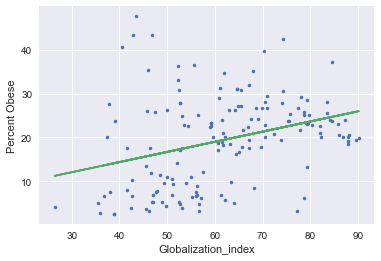

In [176]:
'''''''''
fig, ax = plt.subplots()
ax.scatter(df.HDI, df.Percent_Obese, edgecolors=(0, 0, 0))
ax.plot([df.HDI.min(), df.HDI.max()], [df.Percent_Obese.min(), df.Percent_Obese.max()], 'k-', lw=2)
ax.set_xlabel('HDI')
ax.set_ylabel('Percent Obese')
plt.show()
'''''''''
fig, ax = plt.subplots()
ax.set_xlabel('Globalization_index')
ax.set_ylabel('Percent Obese')
m, b = np.polyfit(df.Globalization_index, df.Percent_Obese, 1)
plt.plot(df.Globalization_index, df.Percent_Obese, '.')
plt.plot(df.Globalization_index, m*df.Globalization_index + b, '-');

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 1)
model.fit(X_train,y_train)
model.score(X_test,y_test)

TypeError: Could not compare ['pinv'] with block values

In [ ]:
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

In [ ]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'Percent_Obese', data=df, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]
for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));
    

In [ ]:
plot_lm_4.savefig('residuals&leverage.png')

In [ ]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')
# annotations
leverage_top_3 = np.flipud(np.argsort(model_cooks))[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
# for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')
p = len(model_fit.params) # number of model parameters
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');

In [ ]:
QQ = stats.probplot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flipud(np.argsort(np.abs(model_norm_residuals)))
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flipud(QQ.theoretical_quantiles)[r],
                                   model_norm_residuals[i]));

In [ ]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');
# annotations
abs_sq_norm_resid = np.flipud(np.argsort(model_norm_residuals_abs_sqrt))
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));


In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
from sklearn.cross_validation import cross_val_score
y = np.ravel(y)
scores = cross_val_score(model, X, y, cv=100, scoring='neg_mean_squared_error')
print('Stratified %i folds cross validation mean' + 'Folds: %i, mean squared error: %.2f std: %.2f'
%(len(scores),np.mean(np.abs(scores)),np.std(scores)))

In [173]:
#df = pd.read_csv('Obese_model_data.csv')

In [ ]:
#df = df[['Percent_Obese', 'country','GDPper_cap','Insufficiently_active','HDI','Region_Africa','Region_Arab_States','Region_Europe','Region_Asia_Pacific','Region_Latin_America','Globalization_index','Urbanization_Rate','Urban_Population','Imports']]

In [ ]:
model = smf.ols(formula='Percent_Obese ~ Education + np.log(Imports) + Insufficiently_active + Urban_Population:Region_Arab_States + Urbanization_Rate*Region_Asia_Pacific + Globalization_index:Region_Asia_Pacific + GDPper_cap:Region_Europe + Urbanization_Rate:np.log(GDPper_cap)', data=df)
model_fit = model.fit()

In [ ]:
import pylab
fig = pylab.figure()
model_fit.resid.plot(style='o', figsize=(12,8));
plt.xlabel('Index')
plt.ylabel('Error ($)')
plt.title('Model Residuals');

In [ ]:
fig.savefig('resid.png')

In [180]:
df.to_csv('Countries_Obesity_data.csv')